In [21]:
!pip install bioinfokit

     |████████████████████████████████| 84 kB 1.1 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56750 sha256=927f48944196d9fbbe1a3deafd0307cd4acde865e6eb80c074c315058da0bac4
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=6847c83a9baa7d7e6901d88d4194b743d1afccf3549adfc10f5dca3120642cf0
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [22]:
!pip install pingouin

     |████████████████████████████████| 183 kB 5.3 MB/s 
     |████████████████████████████████| 38.1 MB 68.1 MB/s 
     |████████████████████████████████| 9.8 MB 30.9 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=518d76bba791a2e5a086a133f1917bae67713478dab9e79b14a948b7b6e06295
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=ea4d2c2581760b7461958147de95144553db0a57a992ba07be33c270f4ec1b45
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling stats

In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
import scipy.stats as stats

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sa
import statsmodels.formula.api as sfa
!pip install scikit_posthocs
import scikit_posthocs as sp

In [36]:
df = pd.read_csv('/diabetes.csv')
df.head()

#to_drop = [] - no column to drop - all of the columns in the dataset are related to diabetes and there's no extraneous information

#df = df.set_index('Glucose') - there are no unique identifier values in any of the columns so I wouldn't use any of them as the index

#turn the continuous variable of glucose level into a categorical level indicating whether the level is normal, prediabetic, or diabetic, as per the CDC's guidelines
#https://www.cdc.gov/diabetes/basics/getting-tested.html#:~:text=A%20fasting%20blood%20sugar%20level,higher%20indicates%20you%20have%20diabetes.
category = pd.cut(df.Glucose, bins = [0,99,125,300], labels = ['normal','prediabetes','diabetes'])
df.insert(1, 'GlucoseCategory', category)
df.sample(10)

#turn the continuous variable of age into a cateogrical measure, based o nthe age ranges indicated by the CDC to have jumps in diabetes risks
#https://www.medicalnewstoday.com/articles/317375#:~:text=The%20risk%20of%20developing%20diabetes,those%20aged%20over%2065%20years.
category1 = pd.cut(df.Age, bins = [0,18,45,65,151], labels = ['0-17', '18-44','45-64','>65'])
df.insert(9, 'AgeCategory', category1)
df.sample(10)


Pregnancies GlucoseCategory  Glucose  BloodPressure  SkinThickness  \
441            2          normal       83             66             23   
587            6     prediabetes      103             66              0   
742            1     prediabetes      109             58             18   
199            4        diabetes      148             60             27   
330            8     prediabetes      118             72             19   
16             0     prediabetes      118             84             47   
133            8          normal       84             74             31   
11            10        diabetes      168             74              0   
635           13     prediabetes      104             72              0   
339            7        diabetes      178             84              0   

     Insulin   BMI  DiabetesPedigreeFunction  Age AgeCategory  Outcome  
441       50  32.2                     0.497   22       18-44        0  
587        0  24.3                     0.249   29       18-44        0  
742      116  28.5                     0.219   22       18-44        0  
199      318  30.9                     0.150   29       18-44        1  
330        0  23.1                     1.476   46       45-64        0  
16       230  45.8                     0.551   31       18-44        1  
133        0  38.3                     0.457   39       18-44        0  
11         0  38.0                     0.537   34       18-44        1  
635        0  31.2                     0.465   38       18-44        1  
339        0  39.9                     0.331   41       18-44        1

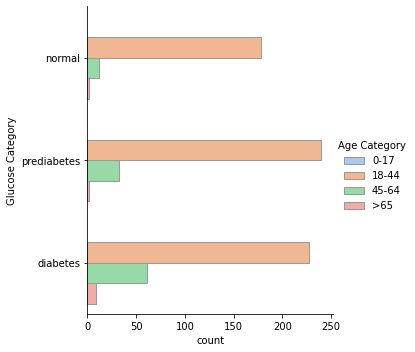

In [7]:
#this visualization helps me see that, first, the data is heavily skewed towards eole in the 18-44 age range
#it also shows that there might not be that much correlation between age and glucose levels
sns.catplot(y="Glucose Category", hue="Age Category", kind="count", palette="pastel", edgecolor=".6", data=df)

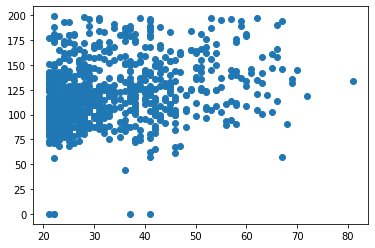

In [8]:
#this scatter plot drives home that there isn't really a notable correlation between age and glucose levels 
#I used the continuous variables for this visualization because its a scatter plot, whereas for the bar graph above I used the categorical columns
x = df['Age']
y = df['Glucose']
plt.xlabel = ('Age')
plt.ylabel = ('Glucose')
plt.scatter(x,y)

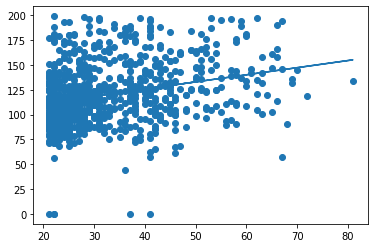

In [9]:
#the linear regressio nvisualization allso indicates that there isn't a huge correlatrion between glucose levels and age. #
#There is a very slight indication that as aage increases so does Glucose level
from sklearn.linear_model import LinearRegression

x = df['Age'].values.reshape(-1,1)
y = df['Glucose']

lr_model = LinearRegression()
lr_model.fit(x, y)
y_pred = lr_model.predict(x)

plt.scatter(x, y)


plt.plot(x, y_pred)

In [19]:
sp.posthoc_ttest(df, val_col='Glucose', group_col='Age', p_adjust='holm')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


50   31   32        21   33   30   26   29        53   54  ...   52  \
50  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
31  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
32  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
21  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  0.134859  1.0  ...  1.0   
33  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
30  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
26  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
29  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
53  1.0  1.0  1.0  0.134859  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
54  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
34  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
57  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
59  1.0  1.0  1.0  0.063889  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
51  1.0  1.0  1.0  0.078976  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
27  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
41  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
43  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
22  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
38  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
60  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
28  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
45  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
35  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
46  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
56  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
37  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
48  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
40  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
25  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
24  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
58  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
42  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
44  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
39  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
36  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
23  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  0.924773  1.0  ...  1.0   
61  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
69  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
62  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
55  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
65  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
47  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
52  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
66  1.0  1.0  1.0  0.544634  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
49  1.0  1.0  1.0  0.375290  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
63  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
67  1.0  1.0  1.0  1.000000  1.0  1.0  1.0  1.0  1.000000  1.0  ...  1.0   
72  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN       NaN  NaN  ...  NaN   
81  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN       NaN  NaN  ...  NaN   
64  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN       NaN  NaN  ...  NaN   
70  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN       NaN  NaN  ...  NaN   
68  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN      

In [29]:
model_diab = ols('Glucose ~ C(Outcome)', data=df).fit()
anova_table = sm.stats.anova_lm(model_diab, typ=2)
anova_table

sum_sq     df           F        PR(>F)
C(Outcome)  170689.421957    1.0  213.161752  8.935432e-43
Residual    613375.035075  766.0         NaN           NaN

In [37]:
model_diab = ols('Glucose ~ C(AgeCategory)', data=df).fit()
anova_table = sm.stats.anova_lm(model_diab, typ=2)
anova_table

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  


sum_sq     df         F    PR(>F)
C(AgeCategory)    1063.784987    3.0  0.357847  0.549882
Residual        757056.363281  764.0       NaN       NaN

In [38]:
res_a = stat()
res_a.anova_stat(
    df=df,res_var='Glucose',anova_model='Glucose ~ C(AgeCategory)'
    )
res_a.anova_summary

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  


df         sum_sq     mean_sq         F    PR(>F)
C(AgeCategory)    3.0    1063.784987  354.594996  0.357847  0.549882
Residual        764.0  757056.363281  990.911470       NaN       NaN

In [39]:
res_a = stat()
res_a.anova_stat(
    df=df,res_var='Glucose',anova_model='Glucose ~ C(Outcome)'
    )
res_a.anova_summary

df         sum_sq        mean_sq           F        PR(>F)
C(Outcome)    1.0  170689.421957  170689.421957  213.161752  8.935432e-43
Residual    766.0  613375.035075     800.750699         NaN           NaN

In [40]:
res_a = stat()
res_a.anova_stat(
    df=df,res_var='Age',anova_model='Age ~ C(Outcome)'
    )
res_a.anova_summary

df         sum_sq      mean_sq          F        PR(>F)
C(Outcome)    1.0    6026.695153  6026.695153  46.140611  2.209975e-11
Residual    766.0  100051.741045   130.615850        NaN           NaN

In [46]:
ols_lr = smf.ols(formula='Outcome ~ Glucose + Age', data=df, subset=None, drop_cols=None)
residual = ols_lr.fit()
print(residual.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     115.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.41e-44
Time:                        03:26:05   Log-Likelihood:                -419.29
No. Observations:                 768   AIC:                             844.6
Df Residuals:                     765   BIC:                             858.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6007      0.066     -9.145      0.0

In [47]:
ols_ancova = smf.ols(formula='Outcome ~ GlucoseCategory + Age', data=df, subset=None, drop_cols=None)
ancova_outcome = ols_ancova.fit()
aov = sm.stats.anova_lm(ancova_outcome, typ=2)
print(aov)

                     sum_sq     df          F        PR(>F)
GlucoseCategory   26.627582    2.0  73.729119  5.473483e-30
Age                2.544557    1.0  14.091248  1.874525e-04
Residual         137.058022  759.0        NaN           NaN
